   Unnamed: 0  overall_sr  won
0           1  168.817204    1
1           2  165.432099    0
2           3  121.568627    0
3           4  149.541284    1
4           5  151.898734    0
       Unnamed: 0  overall_sr        won
count   16.000000   16.000000  16.000000
mean     8.500000  152.193716   0.562500
std      4.760952   35.757172   0.512348
min      1.000000   91.176471   0.000000
25%      4.750000  123.759504   0.000000
50%      8.500000  150.949367   1.000000
75%     12.250000  166.278375   1.000000
max     16.000000  222.429907   1.000000
Unnamed: 0    0
overall_sr    0
won           0
dtype: int64


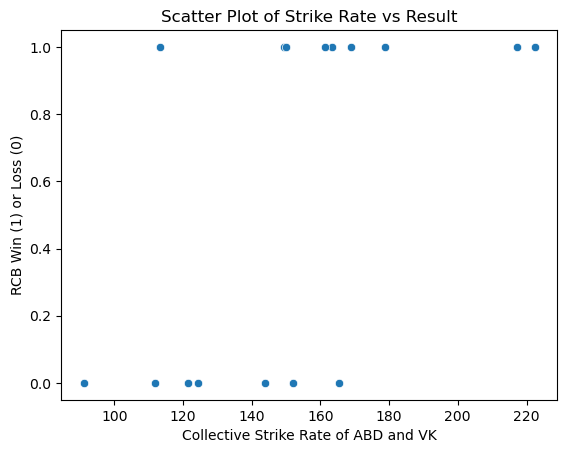

Optimization terminated successfully.
         Current function value: 0.235908
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                   11
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Jun 2024   Pseudo R-squ.:                  0.6576
Time:                        23:20:11   Log-Likelihood:                -2.5950
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                  0.001593
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.5380     45.648     -0.888      0.375    -130.007      48.931
overall_sr     0.2723      0

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('IPL2016.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the data
sns.scatterplot(x='overall_sr', y='won', data=df)
plt.xlabel('Collective Strike Rate of ABD and VK')
plt.ylabel('RCB Win (1) or Loss (0)')
plt.title('Scatter Plot of Strike Rate vs Result')
plt.show()

# Define features (X) and target variable (y)
X = df['overall_sr']
y = df['won']

# Add an intercept term to the features
X = sm.add_constant(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the model
print(result.summary())

# Extract intercept and coefficient



Intercept: -40.537997024895766
Coefficient: 0.2722729152313255


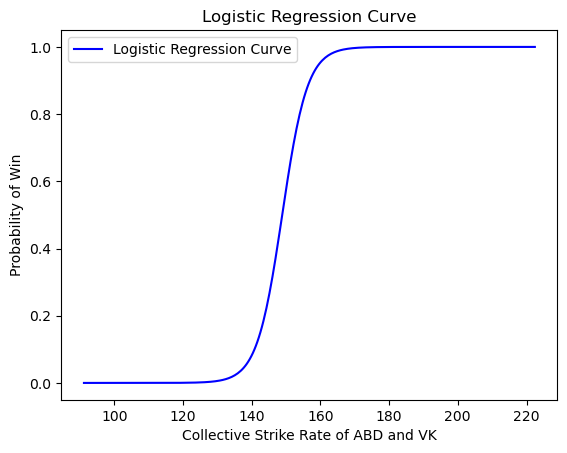

In [15]:
intercept = result.params[0]
coef = result.params[1]

print(f'Intercept: {intercept}')
print(f'Coefficient: {coef}')

# Define the logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-(intercept + coef * x)))

# Plot logistic regression curve
strike_rate_range = np.linspace(X['overall_sr'].min(), X['overall_sr'].max(), 300)
probabilities = logistic_function(strike_rate_range)
plt.figure()
plt.plot(strike_rate_range, probabilities, color='blue', label='Logistic Regression Curve')
plt.xlabel('Collective Strike Rate of ABD and VK')
plt.ylabel('Probability of Win')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()

# Make predictions on the test set


Accuracy: 0.60


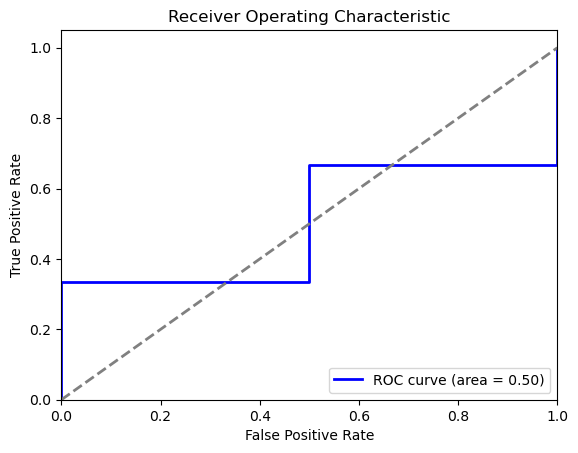

In [17]:
y_pred = result.predict(X_test)

# Convert probabilities to binary outcomes
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Apply tanh transformation to the ROC curve
fpr_tanh = np.tanh(fpr)
tpr_tanh = np.tanh(tpr)

# Plot transformed ROC curve
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()